# Prosper Loan Data Exploration 
## by Maryam Adamu Bala

## Introduction

Prosper Marketplace, Inc. is a San Francisco, California-based company in the peer-to-peer lending industry.This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in the dataset and explore its properties 

In [2]:
# load in the dataset into a pandas dataframe, print statistics
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
# prints information about the DataFrame
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
# access the first 5 rows of the dataframe
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

>There are 113,937 rows with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Most of the variables are numeric in nature.

### What is/are the main feature(s) of interest in your dataset?

> The dataset has plenty of features to explore. For the purpose of this analysis, I'll explore BorrowerAPR and BorrowerRate variables along with other features.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The main features that I am interested in for my investigation include: 

|Column      | Description |
| :---       | :---: |
|**Term**       | The length of the loan expressed in months.
| **LoanStatus** | The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
|**BorrowerAPR**            | The Borrower's Annual Percentage Rate (APR) for the loan.
|**BorrowerRate**       | The Borrower's interest rate for this loan. 
|**ProsperRating (Alpha)**| The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
|**ListingCategory** | The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
|**EmploymentStatus** 	  | The employment status of the borrower at the time they posted the listing.
|**IsBorrowerHomeowner**  | A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner. TRUE or FALSE
|**IncomeRange** | The income range of the borrower at the time the listing was created.
|**DebtToIncomeRatio** | The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
|**StatedMonthlyIncome** | The monthly income the borrower stated at the time the listing was created.
|**LoanOriginalAmount** | The original amount of the loan.
| **MonthlyLoanPayment** | The scheduled monthly loan payment.

## Univariate Exploration

**Term**

In [6]:
loans.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

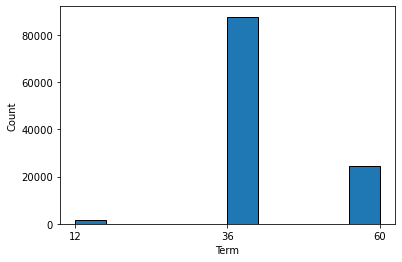

In [7]:
# plot a histogram for the distribution of the terms 
plt.hist(data=loans, x='Term', edgecolor='black')
plt.xticks(ticks=[12, 36, 60], labels=['12', '36', '60'])
plt.xlabel('Term')
plt.ylabel('Count');

> From the plot above, we can see that there are three loan terms and the most popular is 36 months although some people do choose for 60 months (5 years)

**LoanStatus**

- Which categories do majority of loans fall in ?

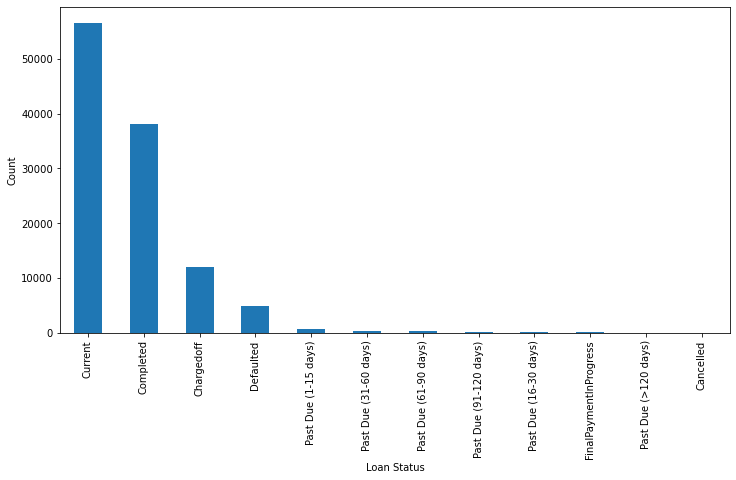

In [8]:
# plot a bar chart for the top 5 loan statuses
plt.figure(figsize = [12, 6]) 
loans['LoanStatus'].value_counts().plot.bar()
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

> We can see from the above plot that majority of the loans in the dataset fall in the categories of Current,followed by Completed, Chargedoff, and Defaulted & Past Due(1-15 days)

**BorrowerAPR**

- What is the distribution of the Borrower APR ?

In [9]:
# statistical properties of the variable 
loans.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

> Descriptive statistics will help us to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's ```arange``` function

In [10]:
def myHistPlot(df, xVar, interval, figsize=[12,6], title=''):
    '''
    input: takes a dataframe, a variable and interval 
    output: returns a histogram distribution of the variable 
    '''
    # set intervals for bins
    bins=np.arange(df[xVar].min(), df[xVar].max()+interval, interval)
    
    # plot
    df[xVar].hist(bins=bins, grid=False, edgecolor='black', figsize=figsize);
    
    # for labels, add a space instead of underscore
    xVar=xVar.replace("_"," ")
    
    # add title and format it 
    plt.title(f'Distrbution of {xVar}{title}'.title(), fontsize = 14, weight = "bold")
    
    # add X label and format it 
    plt.xlabel(xVar.title(), fontsize = 10, weight = "bold")
    
    # add y label and format it 
    plt.ylabel ('Frequency'.title(), fontsize=10, weight = "bold")
    

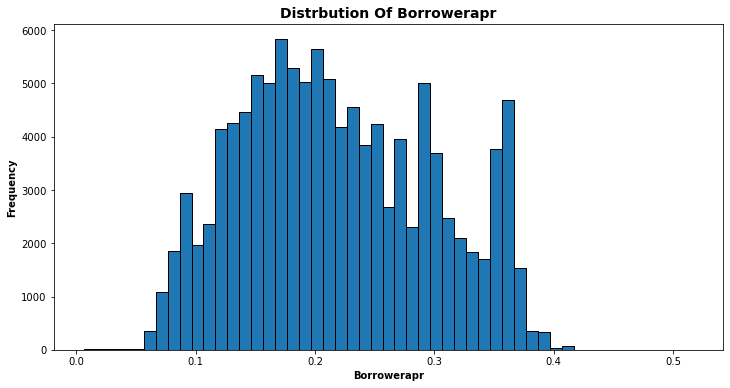

In [11]:
# call plot function (using all data)

myHistPlot(loans,'BorrowerAPR', 0.01)

> The distribution of APR looks multimodal. A small peak centered at 0.09, a large peak centered at 0.18. There is also a small peak centered 0.29 and a high peak between 0.35 and 0.36. Very few people have an APR greater than 0.4.
A high APR means that you will be paying a higher interest rate on any money you borrow.

**BorrowerRate**

In [12]:
# statistical properties of the variable 

loans.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

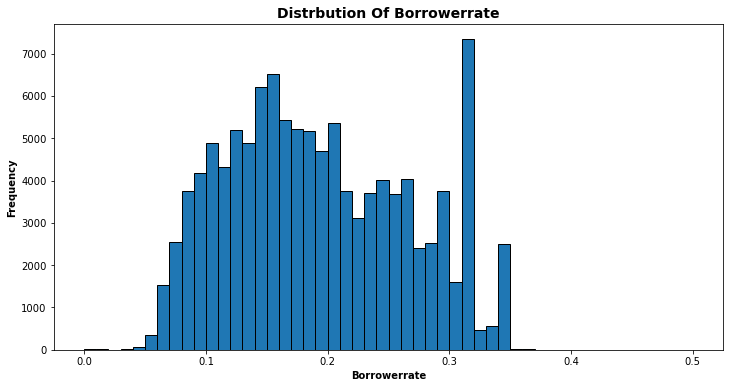

In [13]:
# call plot function (using all data)

myHistPlot(loans,'BorrowerRate', 0.01)

> Multi-modal with a high around 0.31 to 0.32. Very few loans have a rate greater than 0.35

**ProsperRating (Alpha)** 

In [14]:
loans['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [15]:
# convert ProsperRating (Alpha) to ordered categorical types

rating_order = ['AA', 'A', 'B','C', 'D', 'E', 'HR']
ordered = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rating_order)
loans['ProsperRating (Alpha)'] = loans['ProsperRating (Alpha)'].astype(ordered)

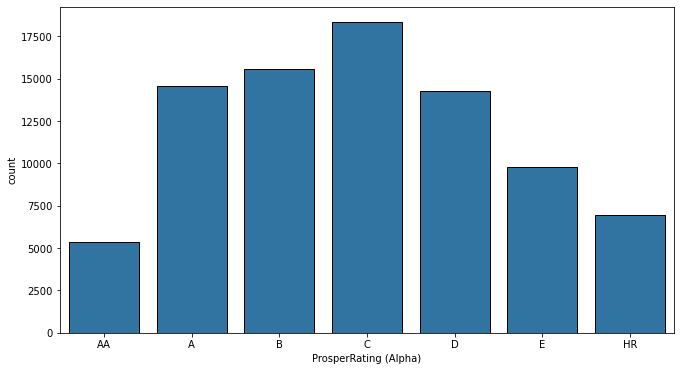

In [16]:
base_color = sns.color_palette()[0]

plt.figure(figsize=(11, 6))
sns.countplot(data= loans, x= 'ProsperRating (Alpha)', color=base_color, edgecolor='black')
plt.show()

> We can see from the above plot that the most frequent scores are C, B and D

**ListingCategory** 

In [17]:
loans['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

- I will replace the numbers with their corresponding meanings in other for us to get a more accurate picture of the variable. 

In [18]:
listing_categories = {0 : 'Not Available', 
                1 : 'Debt Consolidation', 
                2 : 'Home Improvement', 
                3 : 'Business', 
                4 : 'Personal Loan', 
                5 : 'Student Use', 
                6 : 'Auto', 
                7 : 'Other', 
                8 : 'Baby&Adoption', 
                9 : 'Boat', 
                10 : 'Cosmetic Procedure', 
                11 : 'Engagement Ring', 
                12 : 'Green Loans', 
                13 : 'Household Expenses', 
                14 : 'Large Purchases', 
                15 : 'Medical/Dental', 
                16 : 'Motorcycle', 
                17 : 'RV', 
                18 : 'Taxes', 
                19 : 'Vacation', 
                20 : 'Wedding Loans'}

In [19]:
# replace existing numeric variables with the meanings 

loans['ListingCategory'] = loans['ListingCategory (numeric)'].replace(to_replace=listing_categories)

In [20]:
# check if changed has been effected 

loans['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

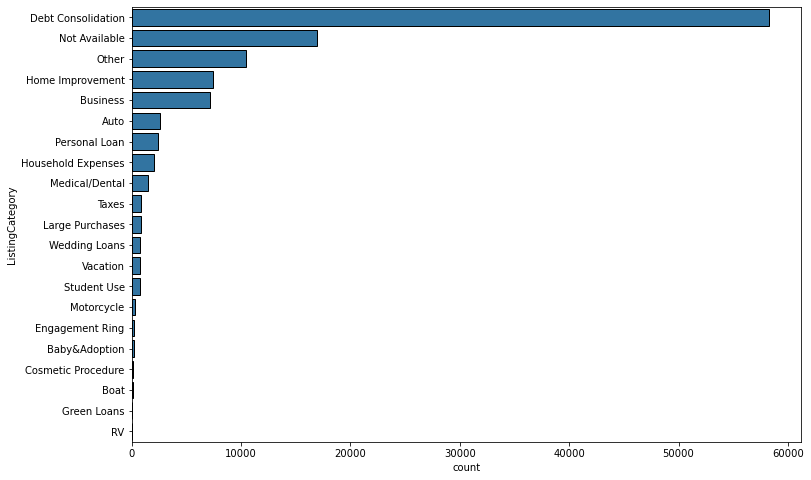

In [21]:
# Bar chart of the listing categories 
order = loans.ListingCategory.value_counts().index
plt.figure(figsize=(12,8))
sns.countplot(data=loans, y='ListingCategory', color=base_color, order=order, edgecolor='black')
plt.show()

> From the plot above, we can see that **Debt Consolidation** is the reason why people take loans i.e.people take loans to pay off their previous loans. 

**EmploymentStatus**

In [22]:
loans.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

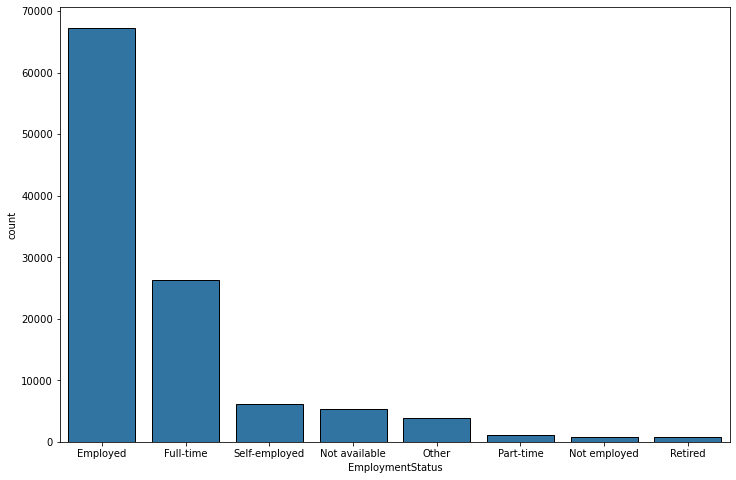

In [23]:
# bar chart showing the employment status of borrowers 

plt.figure(figsize=(12,8))
sns.countplot(data=loans, x='EmploymentStatus', color=base_color, order=loans.EmploymentStatus.value_counts().index, 
              edgecolor='black')
plt.show()

> Most people that take loans are employed. This makes sense because there has to be a source of income in other to be able to pay back the loans. 

**IsBorrowerHomeowner**

In [24]:
loans['IsBorrowerHomeowner'].value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

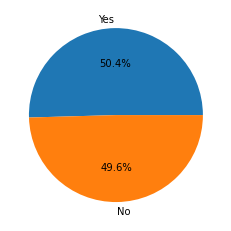

In [25]:
# pie chart to show proportion of people that are homeowners 

labels = ['Yes','No']
plt.pie(loans['IsBorrowerHomeowner'].value_counts(), labels=labels, autopct='%0.1f%%')
plt.show()

> **Slightly** more borrowers are home owners 

**IncomeRange**

In [26]:
loans.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

- To simplify the visualization, I will combine the "Not employed", "Not displayed", and "0" categories together.

In [27]:
loans['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

In [28]:
# create ordinal categories for income
ordinal_rating = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
order = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
loans['IncomeRange'] = loans['IncomeRange'].astype(order)


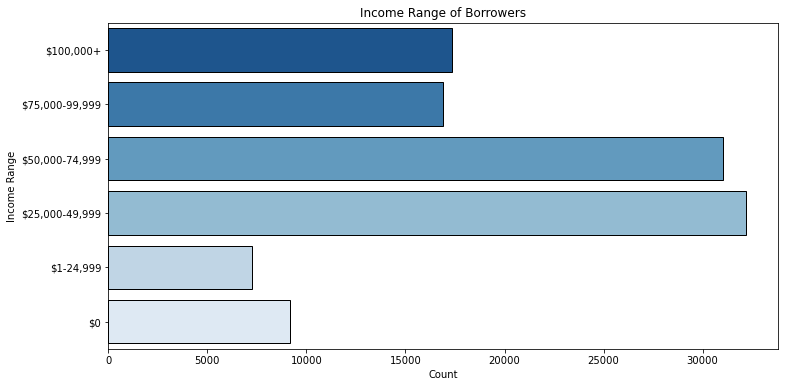

In [29]:
# bar chart
plt.figure(figsize = [12, 6])
sns.countplot(data = loans, y = 'IncomeRange', palette = 'Blues_r', edgecolor='black')
plt.ylabel('Income Range')
plt.xlabel('Count')
plt.title('Income Range of Borrowers');

> The income range with the highest number of borrowers is the $25,000 - 49,999 range 

**Debt to Income Ratio**

In [30]:
loans.DebtToIncomeRatio.value_counts()

0.18000    4132
0.22000    3687
0.17000    3616
0.14000    3553
0.20000    3481
           ... 
0.06375       1
0.06281       1
0.19960       1
0.17775       1
0.23284       1
Name: DebtToIncomeRatio, Length: 1207, dtype: int64

In [31]:
loans.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

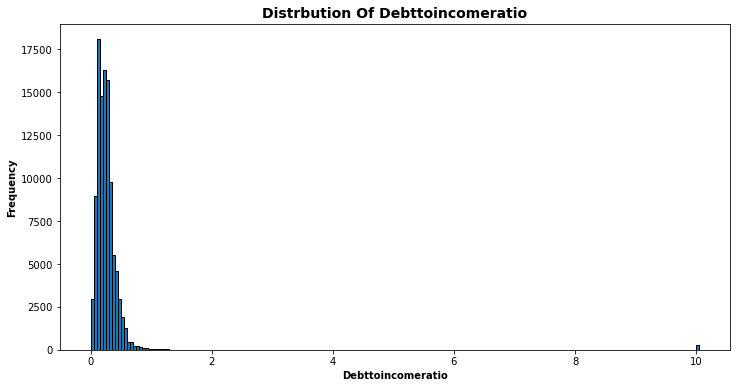

In [32]:
# call plot function 

myHistPlot(loans,'DebtToIncomeRatio', 0.05)

- We can see from the above plot that the distribution is multi-modal with several peaks.
- I will zoom in to view the distribution better. 

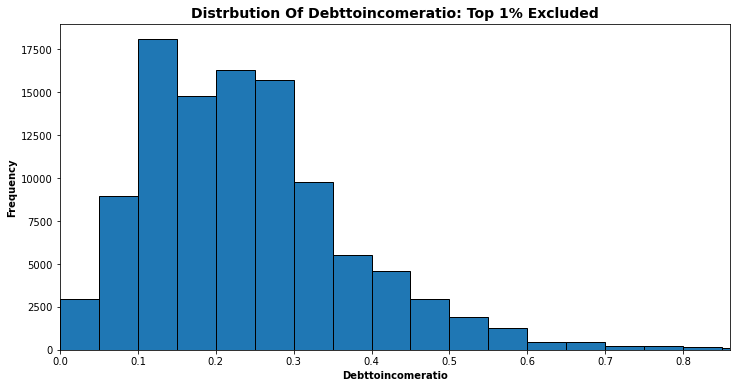

In [33]:
# call plot function 
myHistPlot(loans,'DebtToIncomeRatio', 0.05, title=": Top 1% Excluded")

# set upper bound x axis (99th percentile)
plt.axis([0, loans['DebtToIncomeRatio'].quantile(0.99), None, None]);

> Most of the DebtToIncomeRatios are less than 50%. There are quite few with high debt to income ratio. This ratio needs to be small for borrowers to be able to pay back their loans.

**OriginalLoanAmount**

In [34]:
loans.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

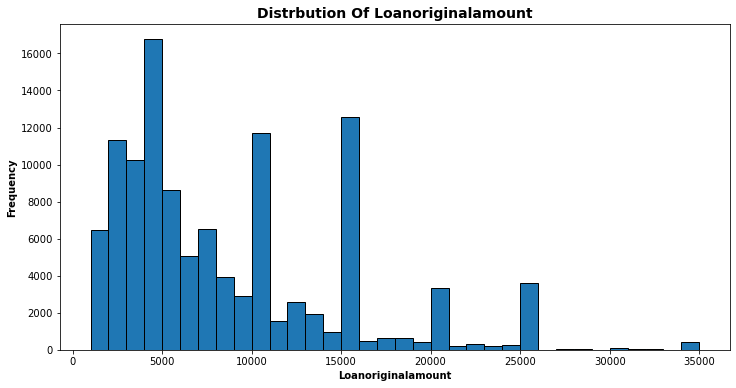

In [35]:
# call plot function for LoanOriginalAmount Distribution

myHistPlot(loans,'LoanOriginalAmount', 1000)

> The highest frequencies are at 4k, followed by 15k and 10k. There are other high spikes at 2k and 5K 

**StatedMonthlyIncome** 

In [36]:
loans.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

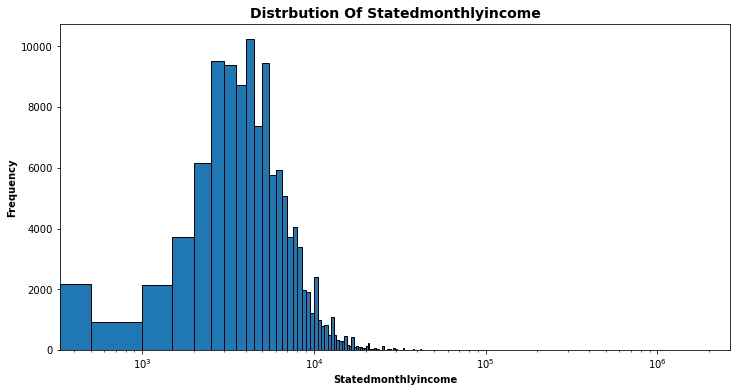

In [37]:
myHistPlot(loans,'StatedMonthlyIncome', 500)
plt.xscale('log')

-  The plot is higly skewed to the right
- I will zoom in to view the distribution better.

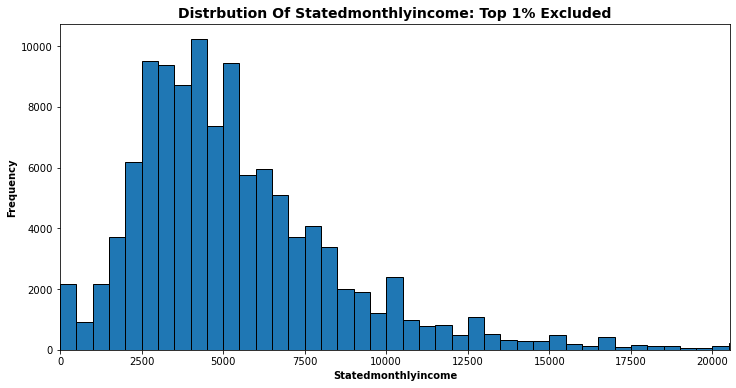

In [38]:
# call plot function 
myHistPlot(loans,'StatedMonthlyIncome', 500, title=": Top 1% Excluded")

# set upper bound x axis (99th percentile)
plt.axis([0, loans['StatedMonthlyIncome'].quantile(0.99), None, None]);

- Most borrowers have a monthly income that is less than 10k
- There are peaks a little below and above 5k

> Let's explore the MonthlyLoanPayment

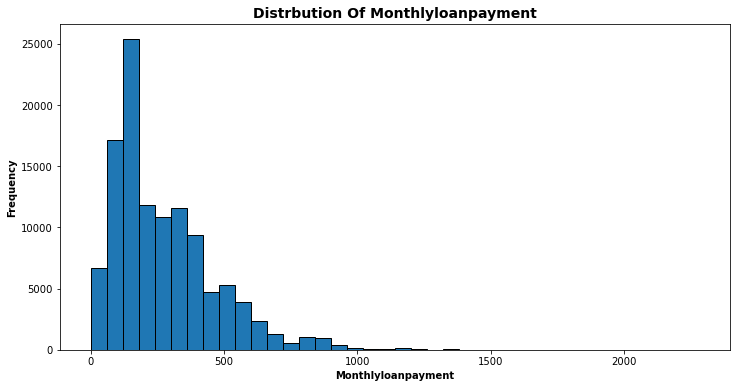

In [39]:
# call plot function for MonthlyLoanPayment Distribution

myHistPlot(loans,'MonthlyLoanPayment', 60)

> Most monthly payments are below 500 USD

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- For the income range, I combined the "Not employed", "Not displayed", and "0" categories together.
- For the ListingCategories. I replaced the numbers with their corresponding meanings in other for us to get a more accurate picture of the variable. 

## Bivariate Exploration

- Correlation between our features of interest. I will separate the variables of interest into Numeric and Categorical for easy visualization. 

In [40]:
# separate into numeric and categorical features

numeric = ['BorrowerAPR', 'BorrowerRate','DebtToIncomeRatio', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'LoanOriginalAmount']

category = ['Term', 'LoanStatus', 'EmploymentStatus', 'IsBorrowerHomeowner','IncomeRange', 'ProsperRating (Alpha)',
            'ListingCategory' ]

### 1. Quantitative Vs. Quantitave

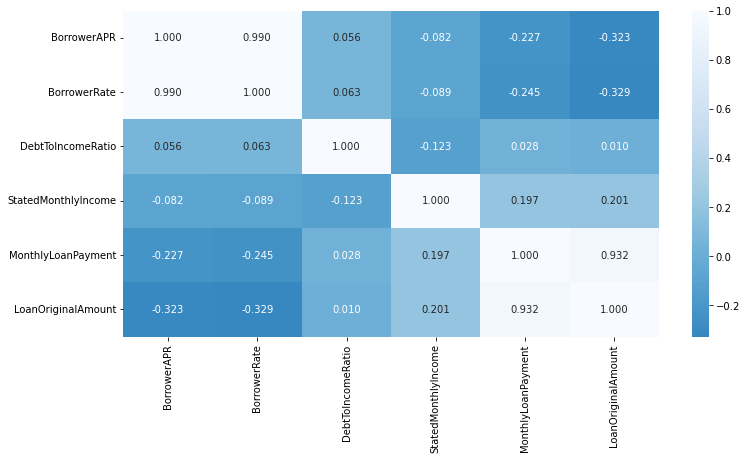

In [41]:
# pairwaise correlation plot 
plt.figure(figsize = [12, 6])
sns.heatmap(loans[numeric].corr(), annot = True, fmt = '.3f', center = 0, cmap = 'Blues_r')
plt.show()

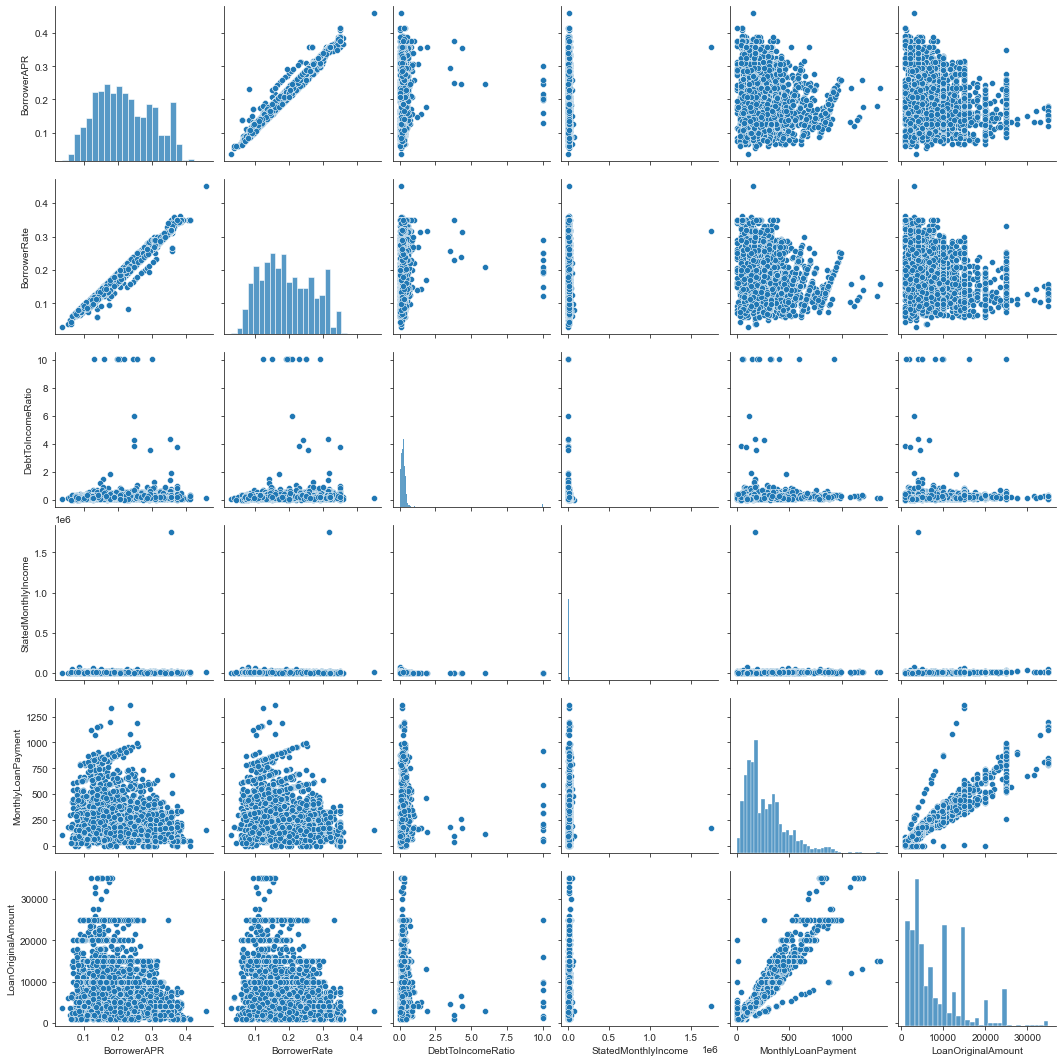

In [42]:
# take a sample of 3000 loans to plot 
samples = np.random.choice(loans.shape[0], 3000, replace = False)
loans_sample = loans.loc[samples,:]

# plot pairwise relationships between the all the numeric variables of interest 
sns.set_style("ticks")
sns.pairplot(data=loans_sample, vars=numeric)
plt.show()


- The correlation coefficient of borrower APR and loan original amount is -0.323, the scatter plot also shows that these two variables are negatively correlated, that is the more the loan amount, the lower the APR. 
- The correlation coefficient of the LoanOriginalAmount and StatedMonthlyIncome is 0.20 showing a very slight positive relationsip between the two variables.  
- BorrowerAPR and BorrowerRate have a very strong correlation coefficient of 0.99 which makes sense because having a high APR will usually result in borrowers paying more interest on their loans. 
- The higher the LoanOriginalAmount, the higher the MonthlyLoanPayment.

### 2. Quantitative vs. Qualitative

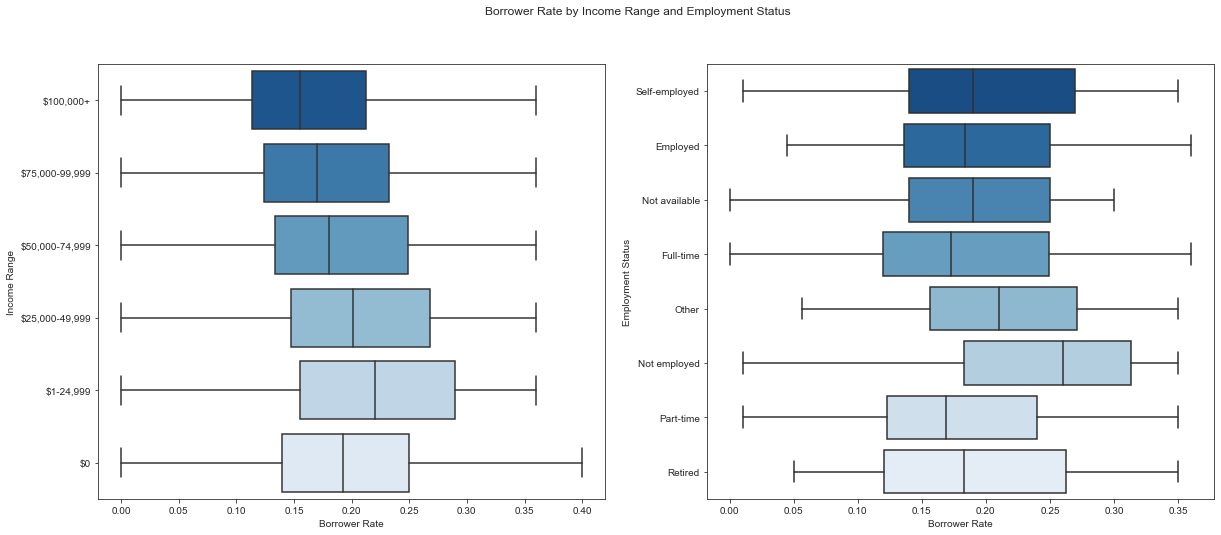

In [43]:
# boxplots between the numeric and categorical features 

# set a larger figure size for subplots
plt.figure(figsize = [20, 8])

# subplot 1 
plt.subplot(1, 2, 1 )
# base_color = sns.color_palette()[1]
sns.boxplot(data = loans, y = 'IncomeRange', x = 'BorrowerRate', palette = "Blues_r", showfliers = False)
plt.ylabel('Income Range')
plt.xlabel('Borrower Rate')


# subplot 2
plt.subplot(1, 2, 2)
#base_color = sns.color_palette()[1]
sns.boxplot(data = loans, y = 'EmploymentStatus', x = 'BorrowerRate', palette = "Blues_r", showfliers = False)
plt.ylabel('Employment Status')
plt.xlabel('Borrower Rate')
plt.suptitle('Borrower Rate by Income Range and Employment Status')
plt.show()



- From these boxplots, we can clearly see that the income range of 1-24,999k has the highest median Borrower rate. It is off from the trend of 25k and above income ranges where median borrower rate reduces with increased income.  
- The unemployed category has the highest median borrower rate. Unemployed individuals pay more interests on loans 

### 3. Qualitative vs. Qualitiative

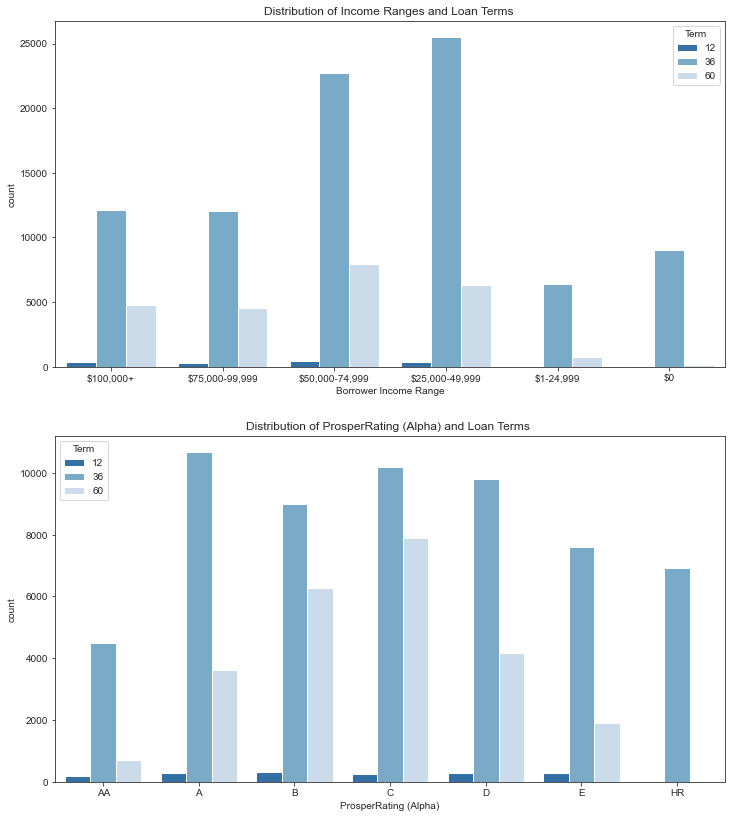

In [44]:
# clustered bar chart of income range and Term 
plt.figure(figsize = [12,14])

plt.subplot(2, 1, 1)
sns.countplot(data = loans, x = 'IncomeRange', hue = 'Term', palette = 'Blues_r')
plt.title('Distribution of Income Ranges and Loan Terms ')
plt.xlabel('Borrower Income Range');


# subplot 2: Prosper rating and term
plt.subplot(2, 1, 2)
sns.countplot(data = loans, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues_r')
plt.title('Distribution of ProsperRating (Alpha) and Loan Terms ')
plt.xlabel('ProsperRating (Alpha)');


- The income range of 25,000 - 49,999 take most of their loans for 36 months followed by the 50,000 - 74,999 income range. Those with 0 income range only take loans for 36 months. 
- There are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers. The A rating has more of 36 months loans.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset? Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?



- The borrower APR is negatively correlated with the loan original amount, which means the more the loan amount, the lower the APR. 
- There is a strong correlations between BorrowerAPR and BorrowerRate and between MonthlyLoanPayment and LoanOriginalAmount 
- The correlation coefficient of the LoanOriginalAmount and StatedMonthlyIncome is 0.20 showing a very slight positive relationsip between the two variables.
- The income range of 25,000 - 49,999 take most of their loans for 36 months followed by the 50,000 - 74,999 income range. Those with 0 income range only take loans for 36 months.
- The unemployed category has the highest median borrower rate. Unemployed individuals pay more interests on loans 

## Multivariate Exploration

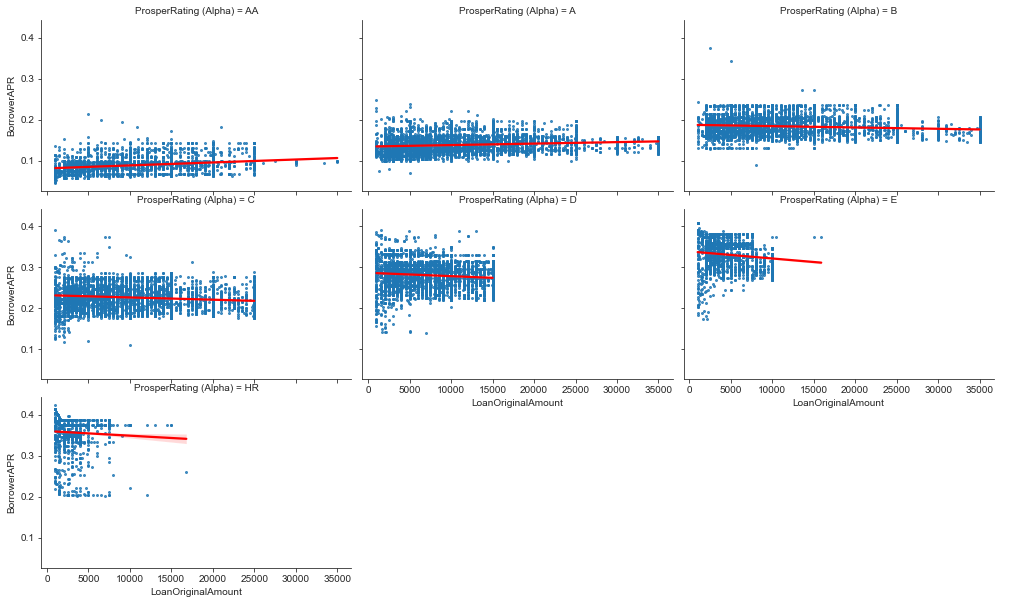

In [45]:
# ProsperRating (Alpha) effect on APR and LoanOriginalAmount 

g=sns.FacetGrid(data=loans, aspect=1, height=6, col='ProsperRating (Alpha)', col_wrap=3)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', scatter_kws={'s':4}, line_kws={'color':'red'})
g.add_legend();

# set plot dimensions 
g.fig.set_size_inches(14, 8)

- The loan amount increases with better rating. 
- The borrower APR decreases with better rating.
- The relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased. 

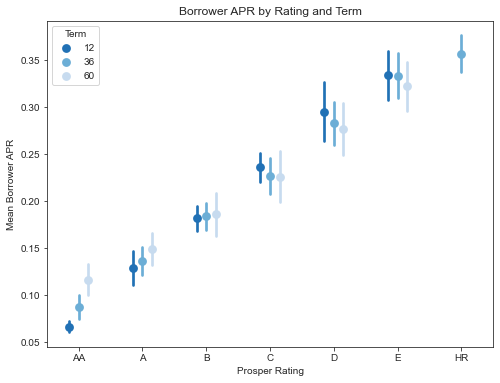

In [46]:
# plot a point plot for rating, loan term and borrower APR 

fig = plt.figure(figsize = [8,6])
sns.pointplot(data = loans, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues_r', dodge = 0.3, ci='sd', linestyles = '')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
plt.xlabel('Prosper Rating')
plt.title('Borrower APR by Rating and Term');

- For AA-B ratings, the APR increases with the increased of loan term.
- The APR decreases with the increased of loan term for C - HR ratings.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The loan amount increases with better rating and the borrower APR decreases with better rating.
- For AA-B ratings, the APR increases with the increased of loan term. The APR decreases with the increased of loan term for C to HR ratings.

### Were there any interesting or surprising interactions between features?

- BorrowerAPR and the LoanOriginalAmount had a negative correlation. With higher loan amounts, the APR tends to be less